## Data Analysis 2: Classfier

In [43]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

pd.set_option('mode.chained_assignment', None)
data_df = pd.read_csv("transformed_reviews.csv")

# Performing rebalancing of the dataset
category5 = data_df[data_df['HelpfulnessNumerator'] == 5]
category4 = data_df[data_df['HelpfulnessNumerator'] == 4].sample(n=category5.shape[0])
category3 = data_df[data_df['HelpfulnessNumerator'] == 3].sample(n=category5.shape[0])
category2 = data_df[data_df['HelpfulnessNumerator'] == 2].sample(n=category5.shape[0])
category1 = data_df[data_df['HelpfulnessNumerator'] == 1].sample(n=category5.shape[0])

categories = [category1, category2, category3, category4, category5]
data_df = pd.concat(categories)

# Create new column to store boolean for POSITIVE (1) or NEGATIVE (0) SentimentLabels 
data_df['SentimentLabelsBoolean'] = np.where(data_df['SentimentLabels'] == 'POSITIVE', 1, 0)

X = data_df[['Score', 'ReviewLength', 'SentimentLabelsBoolean']].values
y = data_df['HelpfulnessNumerator'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

# Use RandomForestClassifier 
randomf_model = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=2000, max_depth=200)
)

randomf_model.fit(X_train, y_train)
print(f"Training score: {randomf_model.score(X_train, y_train)}")
print(f"Validation score: {randomf_model.score(X_valid, y_valid)}")

Training score: 0.8983628922237381
Validation score: 0.6380368098159509


**Classifier Accuracy Visualization**

Text(0.5, 1.0, 'Confusion Matrix')

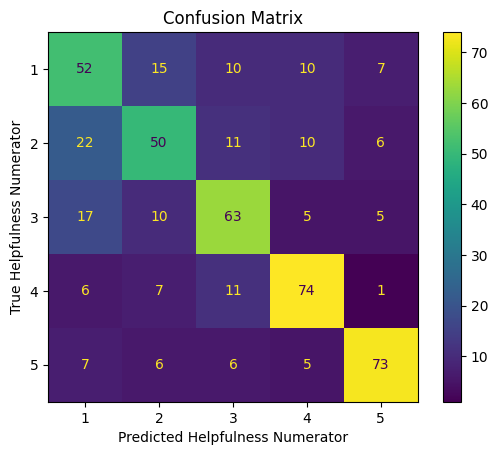

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_valid, randomf_model.predict(X_valid))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=randomf_model.classes_)
disp.plot()
plt.ylabel('True Helpfulness Numerator')
plt.xlabel('Predicted Helpfulness Numerator')
plt.title('Confusion Matrix')
